# Transfer Learning in Keras

In this notebook, we'll cover how to load a pre-trained model (in this case, VGGNet19)


#### Load dependencies

In [28]:
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load the pre-trained VGG19 model

In [3]:
vgg19 = VGG19(include_top=False,
              weights='imagenet',
              input_shape=(224,224,3),
              pooling=None)

80134624/80134624 [==============================] - 0s 0us/step


#### Freeze all the layers in the base VGGNet19 model

In [4]:
for layer in vgg19.layers:
    layer.trainable = False

#### Add custom classification layers

In [5]:
# Instantiate the sequential model and add the VGG19 model:
model = Sequential()
model.add(vgg19)

# Add the custom layers atop the VGG19 model:
model.add(Flatten(name='flattened'))
model.add(Dropout(0.5, name='dropout'))
model.add(Dense(2, activation='softmax', name='predictions'))

#### Compile the model for training

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Prepare the data for training

In [8]:
!unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
  inflating: seefood/test/hot_dog/133012.jpg  
  inflating: seefood/test/hot_dog/133015.jpg  
  inflating: seefood/test/hot_dog/133245.jpg  
  inflating: seefood/test/hot_dog/135628.jpg  
  inflating: seefood/test/hot_dog/138933.jpg  
  inflating: seefood/test/hot_dog/138937.jpg  
  inflating: seefood/test/hot_dog/138969.jpg  
  inflating: seefood/test/hot_dog/139177.jpg  
  inflating: seefood/test/hot_dog/142835.jpg  
  inflating: seefood/test/hot_dog/143012.jpg  
  inflating: seefood/test/hot_dog/144956.jpg  
  inflating: seefood/test/hot_dog/146227.jpg  
  inflating: seefood/test/hot_dog/146834.jpg  
  inflating: seefood/test/hot_dog/147874.jpg  
  inflating: seefood/test/hot_dog/152106.jpg  
  inflating: seefood/test/hot_dog/154409.jpg  
  inflating: seefood/test/hot_dog/154545.jpg  
  inflating: seefood/test/hot_dog/156126.jpg  
  inflating: seefood/test/hot_dog/156135.jpg  
  inflating: seefood/test/hot_dog/160274.jpg  
  inflating: se

In [9]:
# Instantiate two image generator classes:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last',
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='reflect')

valid_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last')

In [10]:
# Define the batch size:
batch_size=32

In [11]:
# Define the train and validation generators:
train_generator = train_datagen.flow_from_directory(
    directory='./train',
    target_size=(224, 224),
    classes=['hot_dog','not_hot_dog'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

valid_generator = valid_datagen.flow_from_directory(
    directory='./test',
    target_size=(224, 224),
    classes=['hot_dog','not_hot_dog'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

Found 498 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
model.fit_generator(train_generator, steps_per_epoch=15,
                    epochs=16, validation_data=valid_generator,
                    validation_steps=15)

<ipython-input-12-511ad3d3c383>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=15,


Epoch 1/16
15/15 [==============================] - 29s 878ms/step - loss: 1.1270 - accuracy: 0.5622 - val_loss: 0.8713 - val_accuracy: 0.5854
Epoch 2/16
15/15 [==============================] - 9s 592ms/step - loss: 0.6438 - accuracy: 0.7124 - val_loss: 0.4665 - val_accuracy: 0.7625
Epoch 3/16
15/15 [==============================] - 10s 668ms/step - loss: 0.4868 - accuracy: 0.7597 - val_loss: 0.4997 - val_accuracy: 0.7625
Epoch 4/16
15/15 [==============================] - 10s 694ms/step - loss: 0.4133 - accuracy: 0.7940 - val_loss: 0.6332 - val_accuracy: 0.7229
Epoch 5/16
15/15 [==============================] - 9s 621ms/step - loss: 0.3719 - accuracy: 0.8458 - val_loss: 0.4544 - val_accuracy: 0.7833
Epoch 6/16
15/15 [==============================] - 10s 634ms/step - loss: 0.3623 - accuracy: 0.8458 - val_loss: 0.5242 - val_accuracy: 0.7563
Epoch 7/16
15/15 [==============================] - 10s 698ms/step - loss: 0.2842 - accuracy: 0.8798 - val_loss: 0.4977 - val_accuracy: 0.7854
E

In [13]:
model.save('model.h5')

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model('model.h5')

In [ ]:
model = keras.models.load_model('model.h5')

In [22]:
import PIL
from PIL import Image as img
import numpy as np

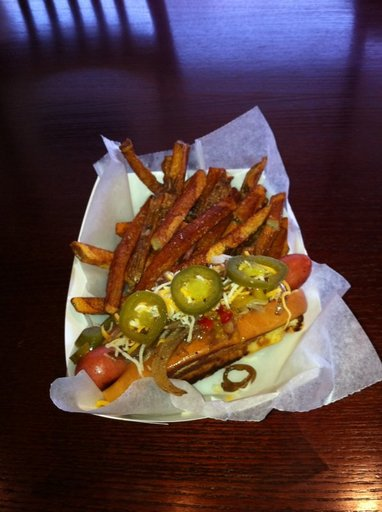

In [17]:
img.open('/content/test/hot_dog/133012.jpg')

In [48]:
img_path = '/content/test/hot_dog/133012.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255.  # Preprocess the image
prediction = model.predict(preprocessed_img)
class_labels = ['hot_dog', 'not_hot_dog']
index = np.argmax(prediction)

1/1 [==============================] - 0s 28ms/step


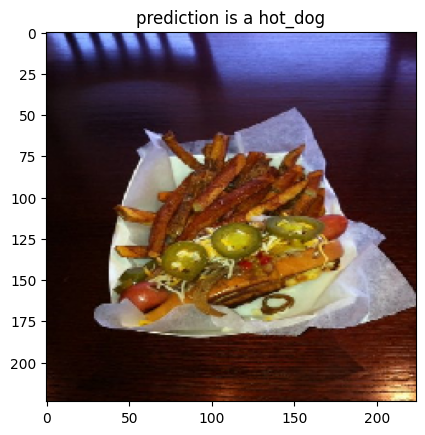

In [49]:
import matplotlib.pyplot as plt
plt.imshow(img);
plt.title('prediction is a ' + class_labels[index]);